# Importing all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

# Importing datasets 

In [2]:
data=pd.read_csv('Fraud_Data.csv')
ip_data=pd.read_csv('IpAddress_to_Country.csv')

In [3]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
ip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [5]:
# Seems that ip_data d onot have any null values in it. 

In [6]:
country = len(data) * [0]

for ind, row in data.iterrows():
    temp = ip_data[(ip_data['lower_bound_ip_address'] < row['ip_address']) & 
           (ip_data['upper_bound_ip_address'] > row['ip_address'])]['country']
    
    if len(temp) == 1:
        country[ind] = temp.values[0]

data['country'] = country

In [7]:
# This is the importent step where we care comparing two datasets columns and replacing the country by using ip_dataset.
# We use ip column from Fraud_Data table and compare with the ip range and then replace the country accordingly.
# Itterrows() is a function which itterate over each and every row and give output index and column values of the row of a table.

In [8]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


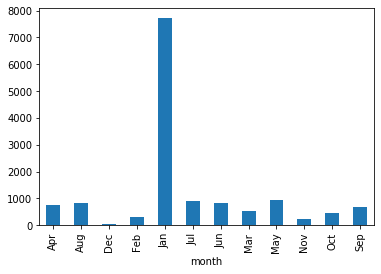

In [9]:
data1=data.copy()
data1['purchase_time']=pd.to_datetime(data1['purchase_time'])
m=[]
for i in range(len(data)):
    a=data1['purchase_time'][i].strftime('%m')
    m.append(a)
data1['month']=m
data1['month']=pd.to_numeric(data1['month'])
data1['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
g=data1.groupby('class')
g1=g.get_group(1)
g2=g1.groupby('month')['user_id'].count().plot(kind='bar')

In [10]:
# In this we can seethat most of the purchases happen on the jan month that mean there is high number of chances of fraud happing in that month.

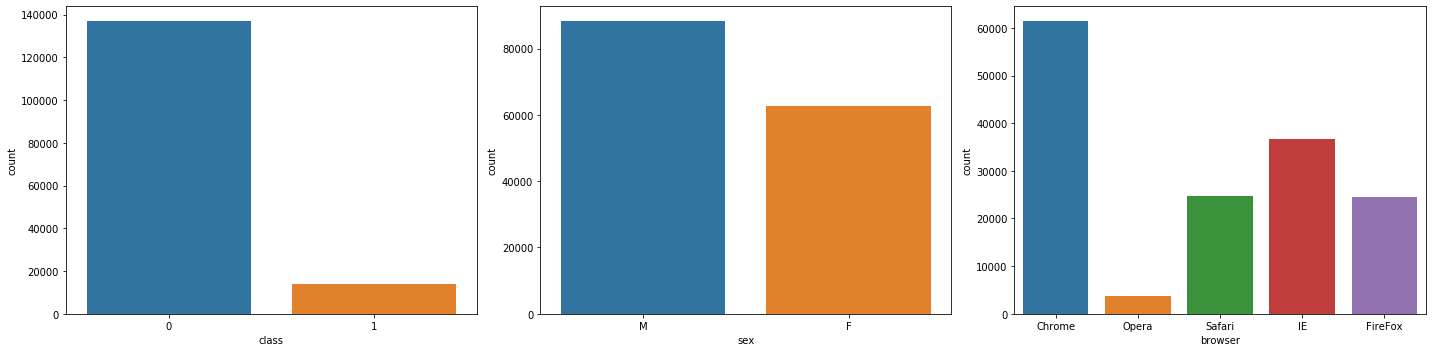

<Figure size 432x288 with 0 Axes>

In [11]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
ax=ax.flatten()
sns.countplot(data['class'],ax=ax[0])
sns.countplot(data['sex'],ax=ax[1])
sns.countplot(data['browser'],ax=ax[2])
plt.tight_layout()
plt.show()
plt.savefig('Univariate Analysis')
plt.show()

In [12]:
# Hear we can check the counts and ratio of catagories.
# 1st graph shows the count of fraud(1) transction and non-fraud(0) transction.
# 2nd graph shows about the count and ratio of male and female.
# 3rd one deals with the browser peoples are using to buy online.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 12 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 13.8+ MB


In [14]:
#It seems that now there are no null values in the dataset.

In [15]:
def diffrence_time(a,b):
    import datetime
    from datetime import timedelta
    datetimeFormat = '%Y-%m-%d %H:%M:%S'
    a1=[]
    b1=[]
    for i in range(len(a)):
        date=datetime.datetime.strptime(a[i], datetimeFormat)
        date2=datetime.datetime.strptime(b[i], datetimeFormat)
        diff=date2-date
        a1.append((diff.days)*86400)
        b1.append((diff.seconds))

    data['diff_days']=a1
    data['diff_sec']=b1
    data['diff_time']=data['diff_days']+data['diff_sec']
    data.drop(columns=['diff_days','diff_sec','signup_time','purchase_time'],inplace=True)
    return 

In [16]:
# Creating one new feature that is diffrence_time which is diffrence if time of sign_up and purchase.

In [17]:
diffrence_time(data['signup_time'],data['purchase_time'] )

In [18]:
group=data.groupby('class')['diff_time'].agg('mean')

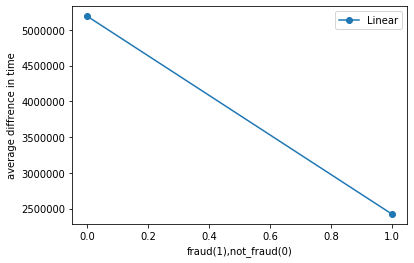

In [19]:
plt.plot(group,'o-',label='Linear')
plt.legend()
plt.xlabel('fraud(1),not_fraud(0)')
plt.ylabel('average diffrence in time')
plt.show()

In [20]:
#It shows that when the avarage diffrance between the account creation time and order placing time increases then the chanage of being fraud decreases.

In [21]:
data.nunique()/151112

user_id           1.000000
purchase_value    0.000807
device_id         0.912939
source            0.000020
browser           0.000033
sex               0.000013
age               0.000384
ip_address        0.949706
class             0.000013
country           0.001204
diff_time         0.949713
dtype: float64

In [22]:
# it seems that the user_id is the unique column and remaining and not unique.

In [23]:
g1=data.groupby('device_id')['user_id'].nunique()
g2=pd.DataFrame(g1).rename(columns={'user_id':'num_used_device'})
data=pd.merge(data,g2,on='device_id',how='left')

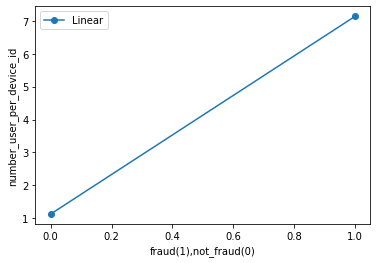

In [24]:
mean_user_per_device=data.groupby('class')['num_used_device'].agg('mean')
plt.plot(mean_user_per_device,'o-',label='Linear')
plt.legend()
plt.xlabel('fraud(1),not_fraud(0)')
plt.ylabel('number_user_per_device_id')
plt.show()

In [25]:
# number of users per device states that how many peoples are using same device to login if the number of used are more per device that mean person is logging into multiple account maybe fraud account from the same pc.

In [26]:
data.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,diff_time,num_used_device
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682,1
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0,492085,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461,1


# Merging of Datasets

In [27]:
g3=data.groupby('ip_address')['user_id'].nunique()
g4=pd.DataFrame(g3).rename(columns={'user_id':'num_ip_repeat'})
data=pd.merge(data,g4,on='ip_address',how='left')

In [28]:
data.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,diff_time,num_used_device,num_ip_repeat
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682,1,1
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0,492085,1,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461,1,1


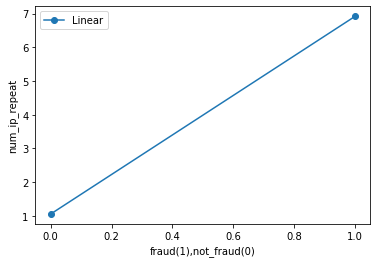

In [29]:
num_ip_repeat=data.groupby('class')['num_ip_repeat'].agg('mean')
plt.plot(num_ip_repeat,'o-',label='Linear')
plt.legend()
plt.xlabel('fraud(1),not_fraud(0)')
plt.ylabel('num_ip_repeat')
plt.show()

In [30]:
data1=data.copy()
data['country'].replace({0:'others'},inplace=True)
m=data.groupby('country')['user_id'].count().sort_values(ascending=False)
not_inc=m.index.values[50:]
for i in not_inc: 
    data['country'].replace({i:'others'},inplace=True)

In [31]:
data.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,diff_time,num_used_device,num_ip_repeat
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682,1,1
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,others,492085,1,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461,1,1


In [32]:
# now we will do lable encoding

In [33]:
X=data.drop(columns=['user_id','class'])
y=data['class']

In [34]:
lc=LabelEncoder()
X['device_id']=lc.fit_transform(X['device_id'])
X['source']=lc.fit_transform(X['source'])
X['browser']=lc.fit_transform(X['browser'])
X['sex']=lc.fit_transform(X['sex'])
X['country']=lc.fit_transform(X['country'])

In [35]:
# now we will build a model and perform anaylsis:

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [37]:
lm=LogisticRegression()
model=lm.fit(x_train,y_train)

In [38]:
y_predict=model.predict(x_test)

In [39]:
models = [('Logistic Regression', LogisticRegression()), 
          ('Decision Trees', DecisionTreeClassifier()), 
          ('Random Forest', RandomForestClassifier()), 
          ('KNN', KNeighborsClassifier()), 
          ('Naive Bayes', GaussianNB())]

# Cross validation:

In [40]:
seed = 7
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.907259 (0.002493)
Decision Trees: 0.915361 (0.001980)
Random Forest: 0.955709 (0.001627)
KNN: 0.943221 (0.002331)
Naive Bayes: 0.907259 (0.002493)


# Modeling by using RandomForestClassifier:

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
model = clf.fit(x_train, y_train)
predictions = model.predict(x_test)
score=accuracy_score(y_test,predictions)
print('score:{}'.format(score))

score:0.9556624167291657


# Confusion matrix for RandomForest:

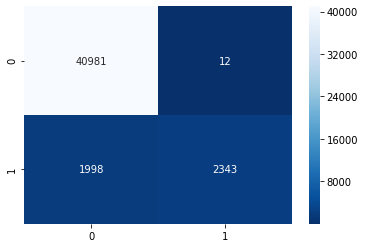

In [43]:
rf_cm = confusion_matrix(y_test,predictions )
sns.heatmap(rf_cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

# Modeling by using GradientBoostingClassifier

In [44]:
GB=GradientBoostingClassifier()
GBmodel=GB.fit(x_train,y_train)
GBpred=GB.predict(x_test)
score1=accuracy_score(y_test,GBpred)
print('score:{}'.format(score1))

score:0.9557727092248643


# Confusion matrix for GradientBoosting:

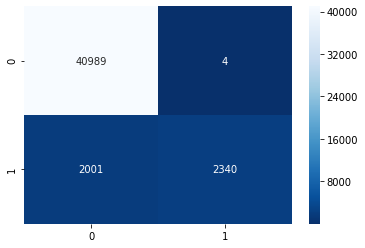

In [45]:
GB_cm = confusion_matrix(y_test,GBpred )
sns.heatmap(GB_cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

In [46]:
# It seems that we have less False Negative for for GradientBoosting so will go with that.

# ROC curve:

RFscore:0.843004940927065
GBscore:0.8441827817699059


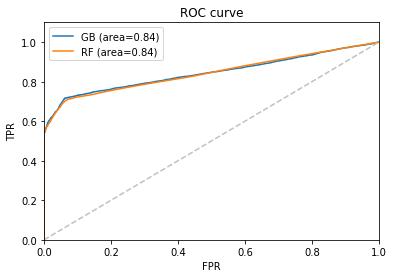

In [49]:
RFpred_proba=model.predict_proba(x_test)
GBpred_proba=GB.predict_proba(x_test)
RFpred_proba  =RFpred_proba[:,1]
GBpred_proba  =GBpred_proba[:,1]
RFfpr,RFtpr,thres=roc_curve(y_test,RFpred_proba)
GBfpr,GBtpr,thres=roc_curve(y_test,GBpred_proba)
RFscore=auc(RFfpr,RFtpr)
GBscore=auc(GBfpr,GBtpr)
print('RFscore:{}'.format(RFscore))
print('GBscore:{}'.format(GBscore))
plt.plot(GBfpr,GBtpr,label='GB (area=%0.2f)'%GBscore)
plt.plot(RFfpr,RFtpr,label='RF (area=%0.2f)'%RFscore)
plt.legend()
plt.plot([0,1],[0,1],color='silver',linestyle='--')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim([0.0,1])
plt.ylim([0.0,1.1])
plt.show()